#  Indicadores Educativos  
----ANALISIS PARA ESTABLECER UN OBJETIVO---
(Aprobación, Deserción, tasas de cobertura, reprobación y matriculación) 

# 📂1.--- Importar las librerías necesarias ---

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📥2.--- Carga de datos ---

In [89]:
data= pd.read_csv("Estadísticas en Educación.csv")
data.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


# 🔍 3.--- EDA (Exploración y Analisis de Datos)---

In [90]:
# Informacion general del Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          14585 non-null  int64  
 1   CÓDIGO_MUNICIPIO             14585 non-null  int64  
 2   MUNICIPIO                    14585 non-null  object 
 3   CÓDIGO_DEPARTAMENTO          14585 non-null  int64  
 4   DEPARTAMENTO                 14585 non-null  object 
 5   CÓDIGO_ETC                   14585 non-null  float64
 6   ETC                          14585 non-null  object 
 7   POBLACIÓN_5_16               14579 non-null  object 
 8   TASA_MATRICULACIÓN_5_16      14470 non-null  float64
 9   COBERTURA_NETA               14474 non-null  float64
 10  COBERTURA_NETA_TRANSICIÓN    14533 non-null  float64
 11  COBERTURA_NETA_PRIMARIA      14494 non-null  float64
 12  COBERTURA_NETA_SECUNDARIA    14491 non-null  float64
 13  COBERTURA_NETA_M

In [91]:
# Verificación de valores nulos en las columnas
print("Columnas con datos faltantes:")
null_cols= data.columns[data.isnull().any()]
for col in null_cols:
    print(f"Columna: {col} → Nulos: {data[col].isnull().sum()} → Tipo: {data[col].dtype}")

Columnas con datos faltantes:
Columna: POBLACIÓN_5_16 → Nulos: 6 → Tipo: object
Columna: TASA_MATRICULACIÓN_5_16 → Nulos: 115 → Tipo: float64
Columna: COBERTURA_NETA → Nulos: 111 → Tipo: float64
Columna: COBERTURA_NETA_TRANSICIÓN → Nulos: 52 → Tipo: float64
Columna: COBERTURA_NETA_PRIMARIA → Nulos: 91 → Tipo: float64
Columna: COBERTURA_NETA_SECUNDARIA → Nulos: 94 → Tipo: float64
Columna: COBERTURA_NETA_MEDIA → Nulos: 93 → Tipo: float64
Columna: COBERTURA_BRUTA → Nulos: 68 → Tipo: float64
Columna: COBERTURA_BRUTA_TRANSICIÓN → Nulos: 97 → Tipo: float64
Columna: COBERTURA_BRUTA_PRIMARIA → Nulos: 81 → Tipo: float64
Columna: COBERTURA_BRUTA_SECUNDARIA → Nulos: 88 → Tipo: float64
Columna: COBERTURA_BRUTA_MEDIA → Nulos: 127 → Tipo: float64
Columna: TAMAÑO_PROMEDIO_DE_GRUPO → Nulos: 7013 → Tipo: float64
Columna: SEDES_CONECTADAS_A_INTERNET → Nulos: 6817 → Tipo: float64
Columna: DESERCIÓN → Nulos: 142 → Tipo: float64
Columna: DESERCIÓN_TRANSICIÓN → Nulos: 903 → Tipo: float64
Columna: DESERCIÓN_

Observamos que las columnas TAMAÑO_PROMEDIO_DE_GRUPO tiene 7013 valores nulos, mientras que la columna SEDES_CONECTADAS_A_INTERNET	tiene 6817 valores nulos. Para dar tratamiento procedemos a...

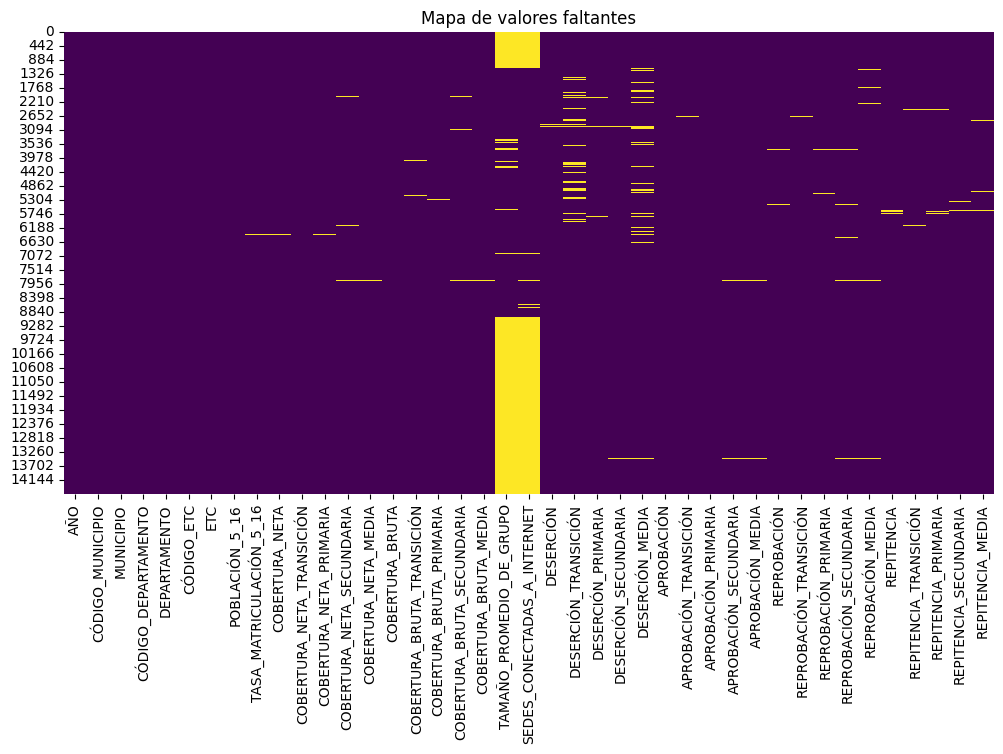

In [92]:
#Gráfica de datos faltantes
import seaborn as sns
import matplotlib.pyplot as plt
# Crear una figura
plt.figure(figsize=(12,6))
# Generar el heatmap de valores faltantes
sns.heatmap(data.isnull(), cmap="viridis", cbar=False)
# Agregar título
plt.title("Mapa de valores faltantes")
plt.show()

In [93]:
#Verificación de filas y columnas duplicadas

# Filas duplicadas
duplicate_rows = data[data.duplicated()]

# Columnas duplicadas
duplicate_columns = data.T.duplicated(keep=False)
duplicated_column_names = data.columns[duplicate_columns]

# Mostrar resultados
print(f" Total de filas duplicadas: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("\n Filas duplicadas en el dataset:")
    print(duplicate_rows)
else:
    print("\n No hay filas duplicadas.")

print("\n Columnas duplicadas en el dataset:")
if len(duplicated_column_names) > 0:
    print(duplicated_column_names.tolist())
else:
    print("\n No hay columnas duplicadas.")

 Total de filas duplicadas: 0

 No hay filas duplicadas.

 Columnas duplicadas en el dataset:
['APROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_TRANSICIÓN']


In [94]:
#Verificar los valores "0" de cada columna
(data == 0).sum()

AÑO                                0
CÓDIGO_MUNICIPIO                   3
MUNICIPIO                          0
CÓDIGO_DEPARTAMENTO                3
DEPARTAMENTO                       0
CÓDIGO_ETC                         3
ETC                                0
POBLACIÓN_5_16                     0
TASA_MATRICULACIÓN_5_16            5
COBERTURA_NETA                     8
COBERTURA_NETA_TRANSICIÓN          9
COBERTURA_NETA_PRIMARIA            8
COBERTURA_NETA_SECUNDARIA         26
COBERTURA_NETA_MEDIA              50
COBERTURA_BRUTA                    8
COBERTURA_BRUTA_TRANSICIÓN         8
COBERTURA_BRUTA_PRIMARIA           8
COBERTURA_BRUTA_SECUNDARIA        26
COBERTURA_BRUTA_MEDIA             43
TAMAÑO_PROMEDIO_DE_GRUPO           0
SEDES_CONECTADAS_A_INTERNET      284
DESERCIÓN                         55
DESERCIÓN_TRANSICIÓN            1219
DESERCIÓN_PRIMARIA               355
DESERCIÓN_SECUNDARIA             195
DESERCIÓN_MEDIA                  698
APROBACIÓN                         3
A

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_40984\2550332263.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')


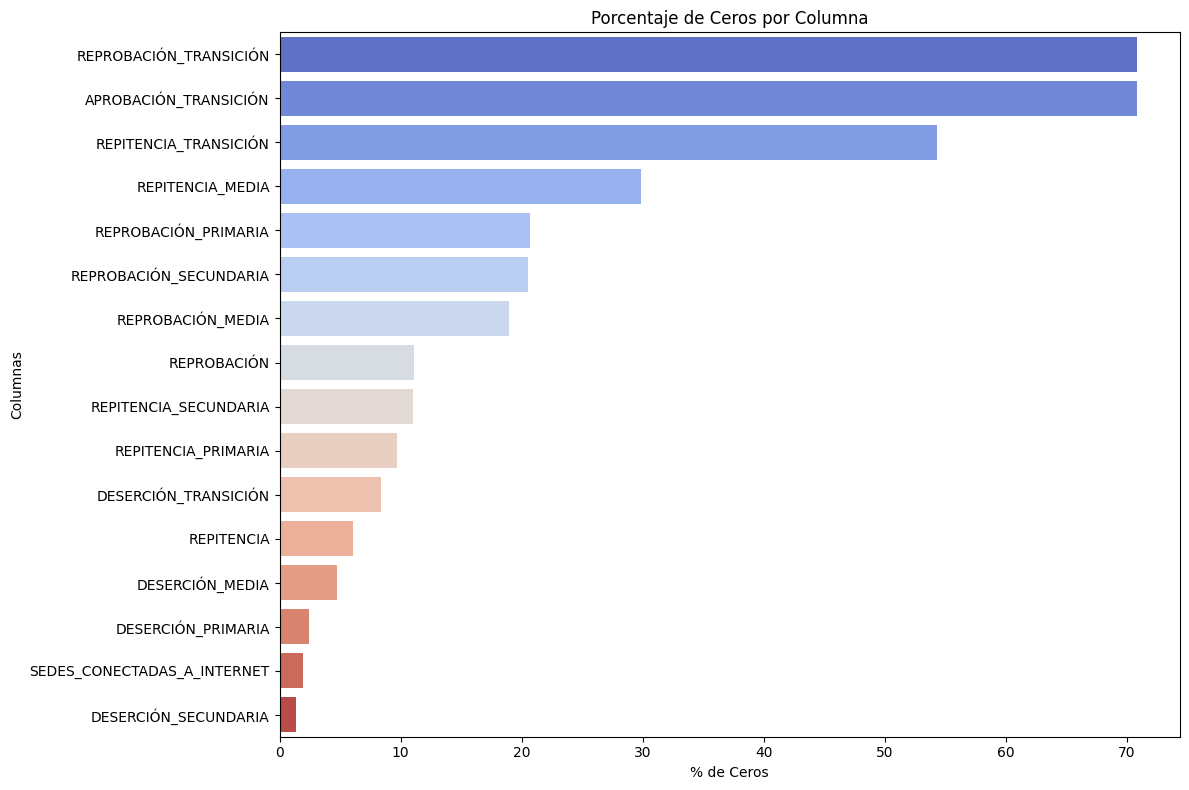

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular % de ceros por columna
zero_counts = (data == 0).sum()
total_rows = len(data)
zero_percentage = (zero_counts / total_rows) * 100

# Crear DataFrame para visualización
zero_df = pd.DataFrame({
    'Columna': zero_counts.index,
    '% de Ceros': zero_percentage
}).sort_values('% de Ceros', ascending=False)

# Filtrar columnas con al menos 1% de ceros (puedes cambiar el umbral)
zero_df = zero_df[zero_df['% de Ceros'] > 1]

# Visualización con seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=zero_df, x='% de Ceros', y='Columna', palette='coolwarm')
plt.title('Porcentaje de Ceros por Columna')
plt.xlabel('% de Ceros')
plt.ylabel('Columnas')
plt.tight_layout()
plt.show()

In [96]:
# Tabla resumen resumen por columna
summary = pd.DataFrame({
    'Columna': data.columns,
    '% de Ceros': (data == 0).sum() / len(data) * 100,
    '% Nulos': data.isnull().sum() / len(data) * 100,
    'Valores Únicos': data.nunique()
}).sort_values(['% de Ceros', '% Nulos'], ascending=False)

# Agregar una sugerencia automatizada
summary['Sugerencia'] = summary.apply(
    lambda row: '❌ Revisar (muchos ceros/nulos o constante)' 
        if (row['% de Ceros'] > 50 or row['% Nulos'] > 50 or row['Valores Únicos'] <= 1)
    else '⚠️ Considerar (alta proporción de ceros o pocos valores)'
        if (row['% de Ceros'] > 30 or row['Valores Únicos'] <= 3)
    else '✅ Conservar', axis=1
)

# Mostrar las columnas más problemáticas primero
summary.reset_index(drop=True, inplace=True)
summary.head(41)  # Puedes cambiar el número de filas mostradas

,Columna,% de Ceros,% Nulos,Valores Únicos,Sugerencia
0,APROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
1,REPROBACIÓN_TRANSICIÓN,70.826191,0.637641,660,❌ Revisar (muchos ceros/nulos o constante)
2,REPITENCIA_TRANSICIÓN,54.268084,1.090161,876,❌ Revisar (muchos ceros/nulos o constante)
3,REPITENCIA_MEDIA,29.852588,0.953034,963,✅ Conservar
4,REPROBACIÓN_PRIMARIA,20.692492,0.665067,1487,✅ Conservar
5,REPROBACIÓN_SECUNDARIA,20.527940,0.726774,2211,✅ Conservar
6,REPROBACIÓN_MEDIA,18.964690,0.994172,1600,✅ Conservar
7,REPROBACIÓN,11.141584,0.589647,1569,✅ Conservar
8,REPITENCIA_SECUNDARIA,11.025026,1.042167,1770,✅ Conservar
9,REPITENCIA_PRIMARIA,9.729174,1.014741,1495,✅ Conservar


💡1.3.1 --- Hallazgos parciales --- 

🟠→ Las columnas 'TAMAÑO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET' presentan 7013 y 6817 valores nulos respectivamentes, se eliminarón del dataset ya que no aportan significativamenta al problema/hipotesis tomado como objeto de estudio. 

🟠→  Las columnas 'APROBACIÓN_TRANSICIÓN' y 'REPROBACIÓN_TRANSICIÓN' están duplicadas, se decidió eliminar 'APROBACIÓN_TRANSICIÓN'.

🟠→  las columnas tipo id  o código se eliminaron ya que están representadas en otras columnas de diferente manera.Estas son: 'CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO'y 'CÓDIGO_ETC'.

🟠→  REPITENCIA_TRANSICIÓN en la tabla resumen por columna arroja una sugerencia de revisión, sin embargo debido a su significado, mientras más valores 0 tenga puede significar que los estudiantes en transición no repitieron periodo escolar. El 0 es el mejor valor ya que los casos de repitencia son bajos, entonces seguimos considerando hasta el momento esta columna para nuestro estudio.

1.4 Limpieza preliminar del dataset

Se eliminan las columnas 'CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO', 'CÓDIGO_ETC', 'APROBACIÓN_TRANSICIÓN', 'TAMAÑO_PROMEDIO_DE_GRUPO' y 'SEDES_CONECTADAS_A_INTERNET'

In [97]:
#Eliminar columnas no necesarias para el análisis
data = data.drop(columns=['CÓDIGO_MUNICIPIO', 'CÓDIGO_DEPARTAMENTO', 'CÓDIGO_ETC', 'APROBACIÓN_TRANSICIÓN','TAMAÑO_PROMEDIO_DE_GRUPO','SEDES_CONECTADAS_A_INTERNET'])

In [98]:
data.head()

,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,377562,96.15,95.94,81.42,94.01,83.58,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),3634,74.38,74.38,50.55,74.32,63.78,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),503,62.62,62.62,44.19,63.33,51.53,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),864,81.37,81.37,61.45,73.21,77.74,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),5060,78.30,78.30,67.65,76.96,65.61,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


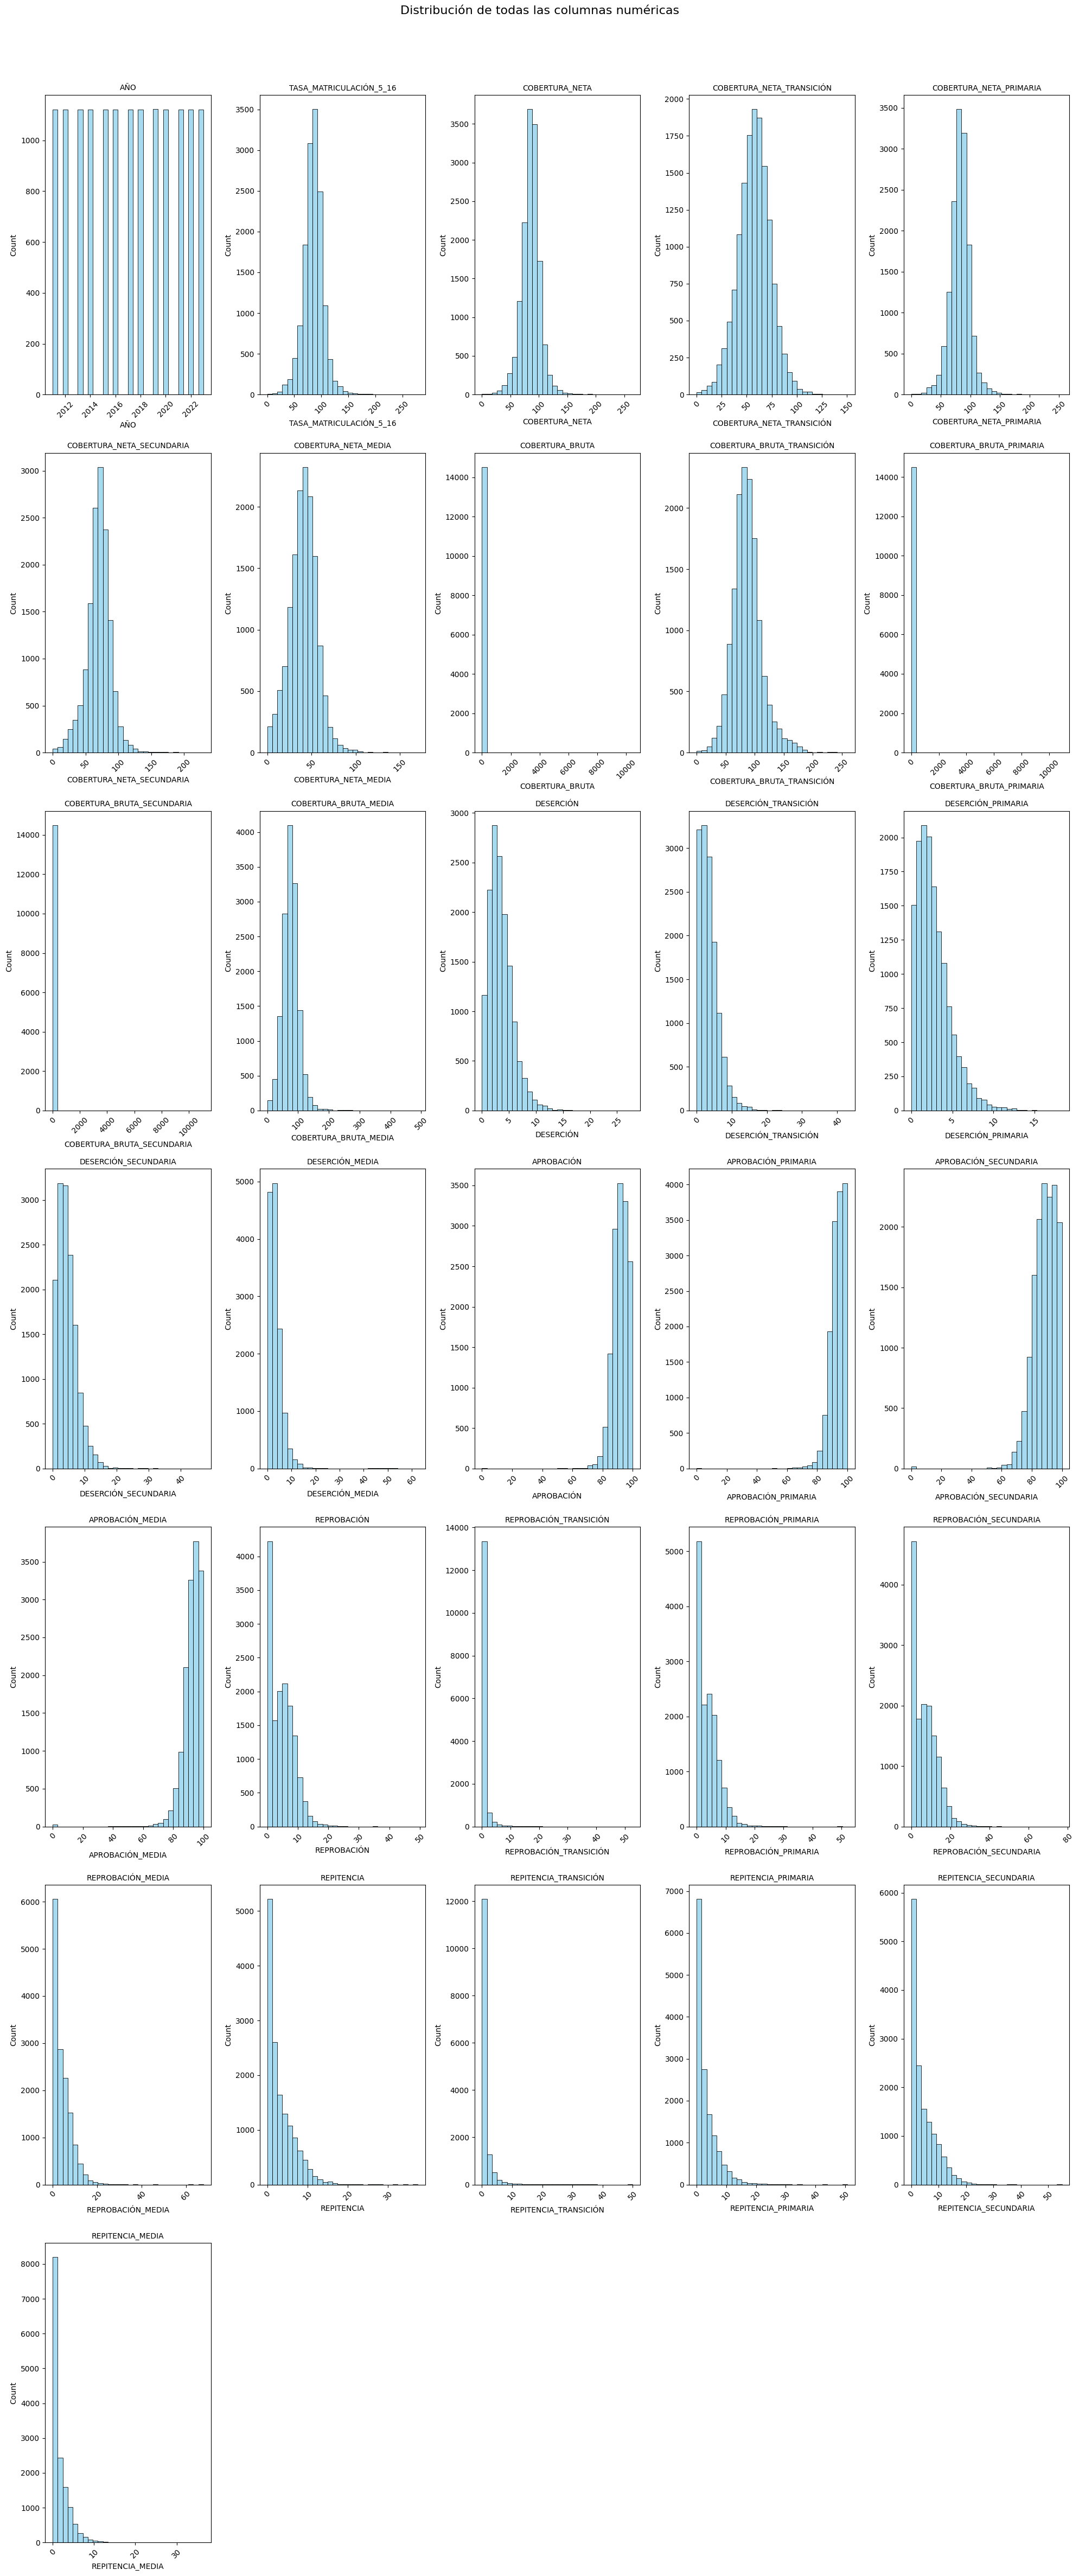

In [99]:
# Verificar la distribución de los datos en columnas numéricas
numeric_cols = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=(len(numeric_cols) // 5) + 1, ncols=5, figsize=(20, len(numeric_cols) * 1.5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col].dropna(), kde=False, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribución de todas las columnas numéricas", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Dado que el gráfico muestra distribuciones asimétricas en varias variables, la imputación de valores nulos con la mediana es la estrategia más adecuada. A diferencia de la media, la mediana no se ve afectada por valores extremos, lo que permite una representación más robusta de la tendencia central de los datos. Usar la mediana garantiza que la imputación refleje mejor el patrón real de los datos sin distorsionar la variabilidad presente en el conjunto de datos. Se ibserva tambien el sesgo en algunas distribuciónes de datos y aunque puede ser una señal de valores atípicos, no siempre significa que haya outliers, lo cuál analizaremos en el punto XXXX.

1.5 Imputación de valores nulos en columnas

Observando que la columna 'POBLACIÓN_5_16' tiene el tipo de dato Object, procedemos a cambiarlo a int64. Luego se eliminaron carácteres extras, para finalmente imputar la mediana a los valores nulos del DataFrame.

In [100]:
#Convertir los datos de la columna 'POBLACIÓN_5_16' de object a int64
# Verificar valores únicos para identificar problemas
print(data['POBLACIÓN_5_16'].unique())

# Limpiar la columna eliminando caracteres extra y manejar valores no numéricos
data['POBLACIÓN_5_16'] = pd.to_numeric(data['POBLACIÓN_5_16'].str.replace(',', '').str.strip(), errors='coerce')

# Rellenar valores nulos con la mediana
data['POBLACIÓN_5_16'].fillna(data['POBLACIÓN_5_16'].median(), inplace=True)

# Convertir a entero
data['POBLACIÓN_5_16'] = data['POBLACIÓN_5_16'].astype(int)

# Verificar la conversión
print("--- Tipo de dato en columnas ---")
print(data.dtypes)

['377562' '3634' '503' ... '208' '4697' '25396']
--- Tipo de dato en columnas ---
AÑO                             int64
MUNICIPIO                      object
DEPARTAMENTO                   object
ETC                            object
POBLACIÓN_5_16                  int64
TASA_MATRICULACIÓN_5_16       float64
COBERTURA_NETA                float64
COBERTURA_NETA_TRANSICIÓN     float64
COBERTURA_NETA_PRIMARIA       float64
COBERTURA_NETA_SECUNDARIA     float64
COBERTURA_NETA_MEDIA          float64
COBERTURA_BRUTA               float64
COBERTURA_BRUTA_TRANSICIÓN    float64
COBERTURA_BRUTA_PRIMARIA      float64
COBERTURA_BRUTA_SECUNDARIA    float64
COBERTURA_BRUTA_MEDIA         float64
DESERCIÓN                     float64
DESERCIÓN_TRANSICIÓN          float64
DESERCIÓN_PRIMARIA            float64
DESERCIÓN_SECUNDARIA          float64
DESERCIÓN_MEDIA               float64
APROBACIÓN                    float64
APROBACIÓN_PRIMARIA           float64
APROBACIÓN_SECUNDARIA         float64
APROBA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_40984\3004672560.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['POBLACIÓN_5_16'].fillna(data['POBLACIÓN_5_16'].median(), inplace=True)


In [101]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include=['number']).columns

# Reemplazar valores nulos con la mediana de cada columna numérica
data[columnas_numericas] = data[columnas_numericas].apply(lambda x: x.fillna(x.median()))

# Verificar que ya no haya valores nulos en ninguna de las columnas
print("--- Cantidad de valores nulos en columnas ---")
print(data.isnull().sum())

--- Cantidad de valores nulos en columnas ---
AÑO                           0
MUNICIPIO                     0
DEPARTAMENTO                  0
ETC                           0
POBLACIÓN_5_16                0
TASA_MATRICULACIÓN_5_16       0
COBERTURA_NETA                0
COBERTURA_NETA_TRANSICIÓN     0
COBERTURA_NETA_PRIMARIA       0
COBERTURA_NETA_SECUNDARIA     0
COBERTURA_NETA_MEDIA          0
COBERTURA_BRUTA               0
COBERTURA_BRUTA_TRANSICIÓN    0
COBERTURA_BRUTA_PRIMARIA      0
COBERTURA_BRUTA_SECUNDARIA    0
COBERTURA_BRUTA_MEDIA         0
DESERCIÓN                     0
DESERCIÓN_TRANSICIÓN          0
DESERCIÓN_PRIMARIA            0
DESERCIÓN_SECUNDARIA          0
DESERCIÓN_MEDIA               0
APROBACIÓN                    0
APROBACIÓN_PRIMARIA           0
APROBACIÓN_SECUNDARIA         0
APROBACIÓN_MEDIA              0
REPROBACIÓN                   0
REPROBACIÓN_TRANSICIÓN        0
REPROBACIÓN_PRIMARIA          0
REPROBACIÓN_SECUNDARIA        0
REPROBACIÓN_MEDIA         

In [102]:
#Visualizamos la información del dataset limpio
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AÑO                         14585 non-null  int64  
 1   MUNICIPIO                   14585 non-null  object 
 2   DEPARTAMENTO                14585 non-null  object 
 3   ETC                         14585 non-null  object 
 4   POBLACIÓN_5_16              14585 non-null  int64  
 5   TASA_MATRICULACIÓN_5_16     14585 non-null  float64
 6   COBERTURA_NETA              14585 non-null  float64
 7   COBERTURA_NETA_TRANSICIÓN   14585 non-null  float64
 8   COBERTURA_NETA_PRIMARIA     14585 non-null  float64
 9   COBERTURA_NETA_SECUNDARIA   14585 non-null  float64
 10  COBERTURA_NETA_MEDIA        14585 non-null  float64
 11  COBERTURA_BRUTA             14585 non-null  float64
 12  COBERTURA_BRUTA_TRANSICIÓN  14585 non-null  float64
 13  COBERTURA_BRUTA_PRIMARIA    145

In [103]:
data.head(1)

,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,377562,96.15,95.94,81.42,94.01,83.58,...,9.23,0.15,6.21,15.4,7.27,9.25,1.82,8.34,13.69,4.48


In [104]:
data.describe()

,AÑO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
count,14585.000000,1.458500e+04,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,...,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000,14585.000000
mean,2016.999383,1.025993e+04,84.974753,85.559640,57.693119,82.568374,69.911964,40.749642,99.684818,87.117530,...,4.755906,0.483706,3.881081,6.804289,4.120564,3.288308,0.932945,3.156419,4.309954,1.690000
std,3.741392,1.438920e+05,18.515703,16.867952,16.169711,17.149856,18.770316,15.579135,148.332951,25.481234,...,3.987754,1.648474,3.790058,6.131304,4.192024,3.355087,2.403920,3.627873,4.527839,2.274632
min,2011.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,1.165000e+03,74.940000,76.950000,47.570000,73.300000,60.490000,31.190000,85.730000,71.550000,...,0.940000,0.000000,0.430000,0.760000,0.680000,0.730000,0.000000,0.600000,0.740000,0.000000
50%,2017.000000,2.641000e+03,85.330000,86.400000,57.900000,82.830000,70.900000,41.165000,97.500000,85.210000,...,4.520000,0.000000,3.330000,6.160000,3.100000,2.160000,0.000000,1.880000,2.740000,0.870000
75%,2020.000000,5.866000e+03,95.300000,94.470000,68.000000,91.860000,80.500000,50.500000,109.200000,100.000000,...,7.390000,0.210000,5.980000,10.790000,6.360000,5.040000,0.920000,4.550000,6.770000,2.530000
max,2023.000000,9.548263e+06,279.030000,264.540000,150.470000,254.960000,229.440000,170.260000,10448.000000,259.290000,...,49.390000,52.710000,51.970000,76.970000,67.860000,37.470000,50.000000,50.760000,55.070000,36.450000


1.6 Analizar los valores atípicos de cada columna

In [105]:
cols_to_check = ['POBLACIÓN_5_16',
    'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA','APROBACIÓN','APROBACIÓN_PRIMARIA','APROBACIÓN_SECUNDARIA','APROBACIÓN_MEDIA',
    'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
    'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Crear una máscara booleana para detectar outliers usando el método IQR
outlier_mask = pd.DataFrame(False, index=data.index, columns=cols_to_check)

for col in cols_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask[col] = (data[col] < lower_bound) | (data[col] > upper_bound)

# Conteo de outliers por columna
outliers_count = outlier_mask.sum().sort_values(ascending=False)

# Filas que contienen al menos un valor atípico
rows_with_outliers = data[outlier_mask.any(axis=1)]

# Mostrar resumen
print("Valores atípicos detectados por columna (método IQR):\n")
print(outliers_count)


# Guardar para inspección
rows_with_outliers.to_csv('registros_con_outliers.csv', index=False)

Valores atípicos detectados por columna (método IQR):

REPROBACIÓN_TRANSICIÓN        2748
REPITENCIA_TRANSICIÓN         1690
POBLACIÓN_5_16                1353
COBERTURA_NETA_SECUNDARIA      724
REPITENCIA_PRIMARIA            703
COBERTURA_NETA                 700
DESERCIÓN_MEDIA                627
COBERTURA_NETA_PRIMARIA        609
REPITENCIA_MEDIA               599
COBERTURA_BRUTA_PRIMARIA       581
COBERTURA_BRUTA_TRANSICIÓN     580
TASA_MATRICULACIÓN_5_16        566
COBERTURA_BRUTA                564
COBERTURA_BRUTA_SECUNDARIA     544
DESERCIÓN_TRANSICIÓN           477
DESERCIÓN_PRIMARIA             458
APROBACIÓN_MEDIA               396
DESERCIÓN_SECUNDARIA           388
COBERTURA_BRUTA_MEDIA          384
REPITENCIA                     370
DESERCIÓN                      369
REPITENCIA_SECUNDARIA          326
REPROBACIÓN_MEDIA              289
COBERTURA_NETA_MEDIA           256
APROBACIÓN_PRIMARIA            255
COBERTURA_NETA_TRANSICIÓN      251
REPROBACIÓN_PRIMARIA           174


1.7 Eliminar filas con valores 0 todos las columnas

In [106]:
# Lista de columnas con indicadores
cols_to_check = [
    'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA', 'COBERTURA_NETA_TRANSICIÓN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA',
    'COBERTURA_BRUTA', 'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
    'DESERCIÓN', 'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA', 'DESERCIÓN_MEDIA',
    'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
    'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA',
    'REPITENCIA', 'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA',
    'REPITENCIA_SECUNDARIA', 'REPITENCIA_MEDIA'
]

# Filtrar registros donde todos esos indicadores son cero
mask_ceros = data[cols_to_check].eq(0).all(axis=1)
municipios_con_datos_en_cero = data[mask_ceros]

# Mostrar resumen
print(f"Total de registros con todos los indicadores en cero: {municipios_con_datos_en_cero.shape[0]}")
print("\nUbicación de los registros con datos en cero:\n")
print(municipios_con_datos_en_cero[['AÑO', 'DEPARTAMENTO', 'MUNICIPIO']].drop_duplicates())

Total de registros con todos los indicadores en cero: 3

Ubicación de los registros con datos en cero:

        AÑO DEPARTAMENTO MUNICIPIO
1115   2023       Vaupés  Papunaua
13238  2021       Vaupés  Papunaua
14579  2022       Vaupés  Papunaua


Estos datos corresponden al periodo de la pandemia (periodo objeto de nuestro estudio), por lo tanto se eliminan del dataset.

In [107]:
# Eliminar filas por índice
data = data.drop([1115, 13238, 14579])

In [108]:
print("total de registros en data después de la eliminación",data.shape)

total de registros en data después de la eliminación (14582, 35)


In [109]:
#Eliminamos la columna 
data.drop(columns=['POBLACIÓN_5_16'],inplace=True)

In [110]:
data.head()

,AÑO,MUNICIPIO,DEPARTAMENTO,ETC,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,Medellín,Antioquia,Medellín,96.15,95.94,81.42,94.01,83.58,57.69,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,Abejorral,Antioquia,Antioquia (ETC),74.38,74.38,50.55,74.32,63.78,40.95,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,Abriaquí,Antioquia,Antioquia (ETC),62.62,62.62,44.19,63.33,51.53,40.23,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,Alejandría,Antioquia,Antioquia (ETC),81.37,81.37,61.45,73.21,77.74,73.08,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,Amagá,Antioquia,Antioquia (ETC),78.30,78.30,67.65,76.96,65.61,38.82,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


Al analizar los datos, identificamos inconsistencias en la columna departamento. Algunos municipios, aunque eran los mismos, aparecían escritos con variaciones en los caracteres, como puntos (.) o comas (,), lo que generaba duplicidades y errores en el análisis.

In [111]:
print(data['DEPARTAMENTO'].unique())

['Antioquia' 'Atlántico' 'Bogotá, D.C.' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Cauca' 'Cesar' 'Córdoba' 'Cundinamarca' 'Chocó' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nariño' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'Guainía' 'Guaviare' 'Vaupés' 'Vichada' 'NACIONAL' 'Bogotá D.C.'
 'Archipiélago de San Andrés. Providencia y Santa Catalina']


In [113]:
# Diccionario con las correcciones necesarias
correcciones = {
    'Bogotá D.C.': 'Bogotá, D.C.',
    'Archipiélago de San Andrés. Providencia y Santa Catalina': 'Archipiélago de San Andrés, Providencia y Santa Catalina'
}

# Aplicar reemplazo exacto
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].replace(correcciones)

# Verificamos que solo queden las versiones correctas
print(data['DEPARTAMENTO'].unique())


['Antioquia' 'Atlántico' 'Bogotá, D.C.' 'Bolívar' 'Boyacá' 'Caldas'
 'Caquetá' 'Cauca' 'Cesar' 'Córdoba' 'Cundinamarca' 'Chocó' 'Huila'
 'La Guajira' 'Magdalena' 'Meta' 'Nariño' 'Norte de Santander' 'Quindio'
 'Risaralda' 'Santander' 'Sucre' 'Tolima' 'Valle del Cauca' 'Arauca'
 'Casanare' 'Putumayo'
 'Archipiélago de San Andrés, Providencia y Santa Catalina' 'Amazonas'
 'Guainía' 'Guaviare' 'Vaupés' 'Vichada' 'NACIONAL']
